In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
file_path = '/content/610158698-Risk-and-Return-Daily-Dataset.xlsx'
df = pd.read_excel(file_path, skiprows=2)
df.head()

,Date,Close Price,Market Cap,Close Price.1,Market Cap.1,Close Price.2,Market Cap.2,Close Price.3,Market Cap.3,Close Price.4,...,Close Price.26,Market Cap.26,Close Price.27,Market Cap.27,Close Price.28,Market Cap.28,Close Price.29,Market Cap.29,Close Price.30,Market Cap.30
0,2010-01-04,17558.73,2.699136e+06,534.54,76400.537211,33.180509,1249.938976,229.160,145489.151674,71.0375,...,193.166667,191129.864792,255.9000,12511.964262,112.35,47286.331219,866.200,25064.971272,353.195850,5200.648767
1,2010-01-05,17686.24,2.715675e+06,536.32,76654.948399,33.000788,1243.168702,229.190,145508.198080,72.5275,...,191.083333,189068.498692,259.1375,12670.258456,112.55,47370.508044,868.250,25124.291511,353.588890,5206.436107
2,2010-01-06,17701.13,2.717177e+06,538.12,76912.218139,33.151365,1248.841093,230.505,146343.065572,73.7100,...,190.291667,188285.179574,260.1750,12720.985939,113.40,47728.259548,856.525,24785.008681,344.548963,5073.327278
3,2010-01-07,17615.72,2.707313e+06,529.07,75618.723056,33.437948,1259.636936,229.260,145552.639696,75.4900,...,190.125000,188120.270286,254.5250,12444.735067,114.50,48191.232083,841.775,24358.192326,342.387242,5041.496906
4,2010-01-08,17540.29,2.697950e+06,520.07,74332.374354,34.108262,1284.888228,228.700,145197.106771,74.7575,...,192.375000,190346.545674,261.4250,12782.103388,114.90,48359.585733,827.350,23940.780400,344.057663,5066.093103


In [68]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df['Daily Return'] = df['Close Price'].pct_change() * 100
df.head()

,Date,Close Price,Market Cap,Close Price.1,Market Cap.1,Close Price.2,Market Cap.2,Close Price.3,Market Cap.3,Close Price.4,...,Market Cap.26,Close Price.27,Market Cap.27,Close Price.28,Market Cap.28,Close Price.29,Market Cap.29,Close Price.30,Market Cap.30,Daily Return
0,2010-01-04,17558.73,2.699136e+06,534.54,76400.537211,33.180509,1249.938976,229.160,145489.151674,71.0375,...,191129.864792,255.9000,12511.964262,112.35,47286.331219,866.200,25064.971272,353.195850,5200.648767,NaN
1,2010-01-05,17686.24,2.715675e+06,536.32,76654.948399,33.000788,1243.168702,229.190,145508.198080,72.5275,...,189068.498692,259.1375,12670.258456,112.55,47370.508044,868.250,25124.291511,353.588890,5206.436107,0.726191
2,2010-01-06,17701.13,2.717177e+06,538.12,76912.218139,33.151365,1248.841093,230.505,146343.065572,73.7100,...,188285.179574,260.1750,12720.985939,113.40,47728.259548,856.525,24785.008681,344.548963,5073.327278,0.084190
3,2010-01-07,17615.72,2.707313e+06,529.07,75618.723056,33.437948,1259.636936,229.260,145552.639696,75.4900,...,188120.270286,254.5250,12444.735067,114.50,48191.232083,841.775,24358.192326,342.387242,5041.496906,-0.482512
4,2010-01-08,17540.29,2.697950e+06,520.07,74332.374354,34.108262,1284.888228,228.700,145197.106771,74.7575,...,190346.545674,261.4250,12782.103388,114.90,48359.585733,827.350,23940.780400,344.057663,5066.093103,-0.428197


**Risk Analysis**

In [69]:
risk = df['Daily Return'].std()
print(f"Risk (Standard Deviation of Daily Returns): {risk:.2f}%")

Risk (Standard Deviation of Daily Returns): 1.09%


**Return Analysis**

In [70]:
mean_return = df['Daily Return'].mean()
print(f"Mean Daily Return: {mean_return:.2f}%")


Mean Daily Return: 0.04%


**Temporal Analysis (Monthly Risk and Return)**

In [71]:
df['Year-Month'] = df['Date'].dt.to_period('M')

# Group by year-month and calculate mean return and risk
monthly_analysis = df.groupby('Year-Month')['Daily Return'].agg(['mean', 'std']).rename(columns={'mean': 'Monthly Return', 'std': 'Monthly Risk'})
monthly_analysis.head()

,Monthly Return,Monthly Risk
Year-Month,,
2010-01,-0.388236,0.972931
2010-02,0.028125,1.148881
2010-03,0.310819,0.685548
2010-04,0.012242,0.847995
2010-05,-0.158427,1.517719


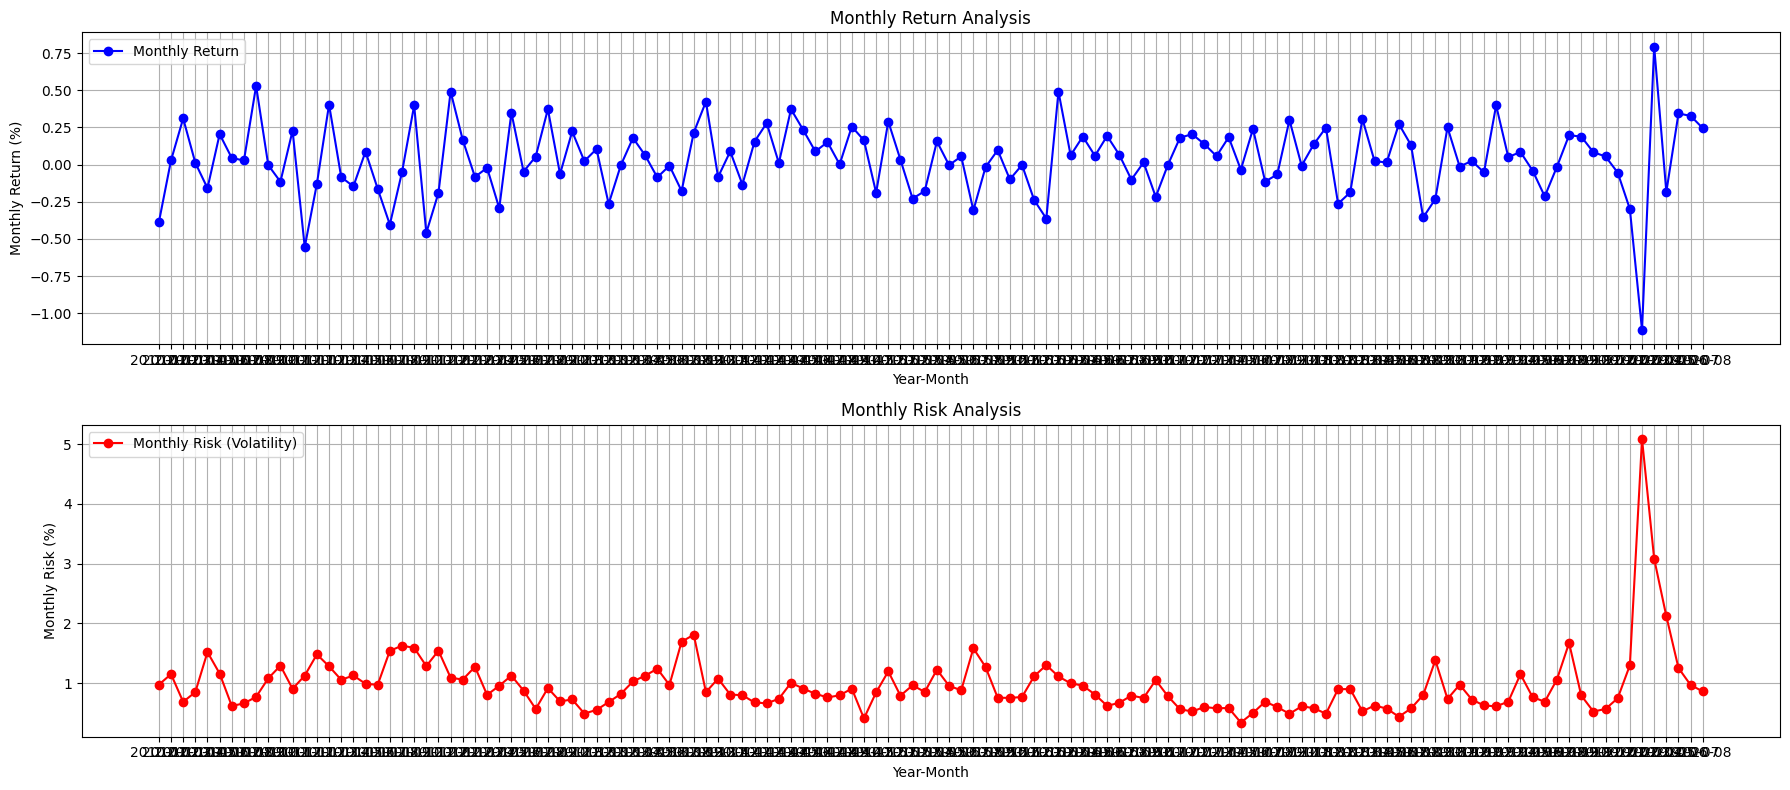

In [72]:
# Plot monthly risk and return
fig, ax = plt.subplots(2, 1, figsize=(18, 8))

# Plot Monthly Return
ax[0].plot(monthly_analysis.index.astype(str), monthly_analysis['Monthly Return'], marker='o', color='blue', label='Monthly Return')
ax[0].set_title('Monthly Return Analysis')
ax[0].set_xlabel('Year-Month')
ax[0].set_ylabel('Monthly Return (%)')
ax[0].legend()
ax[0].grid()

# Plot Monthly Risk
ax[1].plot(monthly_analysis.index.astype(str), monthly_analysis['Monthly Risk'], marker='o', color='red', label='Monthly Risk (Volatility)')
ax[1].set_title('Monthly Risk Analysis')
ax[1].set_xlabel('Year-Month')
ax[1].set_ylabel('Monthly Risk (%)')
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()
